In [ ]:
import numpy as np


num_qubits = 6
matrix_size = 2**num_qubits
num_repetitions = 10000
Mz_values = np.zeros((num_repetitions, matrix_size))


eigenvalues = []
eigenvectors = []

for repetition in range(num_repetitions):


    #create random numbers for H.
    np.random.seed(repetition)
    J = np.random.uniform(low=-1, high=0, size=(num_qubits, num_qubits))
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i >= j:
                J[i, j] = 0
    J = (J + J.T)

    np.random.seed(repetition +10)
    K = np.random.uniform(low=-1, high=1, size=(num_qubits, num_qubits))
    for i in range(num_qubits):
        for j in range(num_qubits):
            if i >= j:
                K[i, j] = 0
    K = (K + K.T)

    np.random.seed(repetition +20)
    h = np.random.uniform(low=-0.04, high=0.04)

    np.random.seed(repetition +30)
    g = np.random.uniform(low=-6, high=6, size=num_qubits)




    # create the matrix of H.
    matrix = np.zeros((matrix_size, matrix_size))
    for i in range(matrix_size):
        for j in range(matrix_size):
            H_value = 0
            for i1 in range(num_qubits):
                for j1 in range(num_qubits):
                    if j == i ^ (2 ** i1 + 2 ** j1):
#This part adds contributions to H_value based on the coupling constants K and the XOR operation (^).
#It checks if the bit-flipped indices i ^ (2 ** i1 + 2 ** j1) are equal to j and adds the corresponding K valeu.
                        H_value += K[i1, j1]
                    if j == i:
                        sign = 1
                        if (i & 2 ** i1) != 0:# & returns 1 if both the bits are 1, otherwise 0.
                            sign = -sign
                        if (i & 2 ** j1) != 0:
                            sign = -sign

                        H_value += sign * J[i1, j1]

            for i1 in range(num_qubits):
                if j == i ^ (2 ** i1):# external fields g for bit-flipped indices.
                    H_value += g[i1]

            if j == i:
                H_value += h # external field h when j is equal to i.
            matrix[i, j] = H_value




    # calculate eigenvalues and eigenvectors.
    eigenval, eigenvect = np.linalg.eigh(matrix)
   # print(eigenval)
   # print(eigenvect)
    min_eigenval = np.min(eigenval)
    min_eigenvec = eigenvect[np.argmin(eigenval), :]

    eigenvalues.append(min_eigenval)
    eigenvectors.append(min_eigenvec)

    #save the eigenvectors as a CSV file
eigenvectors_csv = np.array(eigenvectors)
np.savetxt('eigenvectors.csv', eigenvectors_csv, delimiter=',')
    #print
for repetition in range(num_repetitions):
    print("Repetition", repetition+1)
    print("Eigenvalue:", eigenvalues[repetition])
    print("Eigenvector:", eigenvectors[repetition])

    print()


Streaming output truncated to the last 5000 lines.
  5.77522566e-02  1.21348893e-03  4.48479185e-02 -5.30077239e-02
  3.27554968e-02 -6.68282357e-03  1.17495339e-03 -5.28555156e-02
  7.14778432e-02 -5.11193281e-02  1.88324405e-02 -4.88454855e-02]

Repetition 9677
Eigenvalue: -28.21213623797673
Eigenvector: [ 0.33160483 -0.39593058  0.33038836 -0.36778269  0.03670726 -0.01392454
 -0.10017577  0.01930567 -0.01277983 -0.10860193 -0.37363652  0.07838087
 -0.15410256 -0.11161076  0.10529814 -0.19027176  0.01214103  0.0896024
  0.14393399 -0.12100095 -0.12039487 -0.03014165 -0.02610568  0.1912171
  0.11771199  0.09496342 -0.04063203 -0.06675887 -0.08239773  0.13763494
  0.04772345  0.02397225  0.08166764  0.00910143 -0.047955   -0.0738192
 -0.0262272  -0.00505005  0.03468361  0.01180868  0.06700726 -0.07311162
 -0.09370329 -0.02167845 -0.0199326  -0.04017609  0.06842012  0.02590785
  0.00909504 -0.04888827 -0.02508394 -0.09970215  0.02495249  0.00432717
  0.01462902 -0.03960384  0.03346256 -

In [ ]:
#creating the matrix of data, eigenvectors. each column is eigenvector of a certain H.
eigenvectors_matrix = np.column_stack(eigenvectors)

print("Eigenvectors Matrix:")
print(eigenvectors_matrix)

Eigenvectors Matrix:
[[-0.54433476 -0.49782662  0.45217332 ... -0.38387163  0.52108888
  -0.47295629]
 [ 0.56774045  0.55850957 -0.54347504 ...  0.43846732 -0.56725514
   0.52885565]
 [-0.13330207 -0.29605918  0.20903676 ... -0.06141124  0.03770783
  -0.30938707]
 ...
 [ 0.00163434  0.0679997  -0.01678215 ...  0.04295247 -0.02684776
   0.03302045]
 [-0.03795093 -0.03180435  0.02674316 ... -0.07410374  0.01206066
  -0.0403088 ]
 [ 0.06240238  0.07063507 -0.03774402 ...  0.06660872 -0.07227731
   0.03832864]]


In [ ]:

Mzt = []
for column in eigenvectors_matrix.T:
    i = 0
    Mz = 0
    for component in column:
        for n_prime in range(num_qubits):
            if (2 ** n_prime) & i != 0 :
                Mz += abs(component) ** 2  / num_qubits
          #Mz += abs(component) ** 2 * (2 * ((2 ** n_prime) & i) - 1) / num_qubits
        i += 1
    Mz=2*Mz-1
    Mzt.append(Mz)

Mzt_row = np.array(Mzt)
print("Mzt:", Mzt,"\n")
print(len(Mzt),"\n")
print(Mz)

Mzt: [-0.5805360182675579, -0.5365677303310765, -0.5215773261597751, -0.5306928537385364, -0.33695488826357933, -0.41660286474606256, -0.4606837948780431, -0.5416978704512558, -0.44647266276482134, -0.5576462252018106, -0.5354693506254777, -0.39632279299299966, -0.4824551727372389, -0.44454794152335486, -0.5872379030491448, -0.6520964195670889, -0.4652493518226094, -0.47779762024818473, -0.3466283165703119, -0.48945210322434307, -0.46885386134496887, -0.49415607303876996, -0.41477766183216225, -0.6853666986461697, -0.4316207981321668, -0.531724703990873, -0.388210642505585, -0.39728489648391707, -0.5535927402824606, -0.4091628555650514, -0.6338078101145999, -0.48920300696090147, -0.4312823786401577, -0.43896328444445354, -0.7090591696535611, -0.4790393250542576, -0.5140608081804656, -0.5644251755605612, -0.4246497840197546, -0.4595969867877644, -0.36551422734539796, -0.5942136311875649, -0.6755490046118537, -0.7169716126216247, -0.3654445526597838, -0.5493258700189904, -0.4208764725024

In [ ]:
Mzt_row = np.array(Mzt)
final_data= np.vstack((eigenvectors_matrix, Mzt_row))
print(final_data)

[[-0.54433476 -0.49782662  0.45217332 ... -0.38387163  0.52108888
  -0.47295629]
 [ 0.56774045  0.55850957 -0.54347504 ...  0.43846732 -0.56725514
   0.52885565]
 [-0.13330207 -0.29605918  0.20903676 ... -0.06141124  0.03770783
  -0.30938707]
 ...
 [-0.03795093 -0.03180435  0.02674316 ... -0.07410374  0.01206066
  -0.0403088 ]
 [ 0.06240238  0.07063507 -0.03774402 ...  0.06660872 -0.07227731
   0.03832864]
 [-0.58053602 -0.53656773 -0.52157733 ... -0.30894061 -0.53051308
  -0.57182282]]


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt


# prepare data, i choose minmax as the book chose
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(eigenvectors_matrix)
Mzt = np.array(Mzt)  # convert mzt to an array


In [ ]:
# feature scaling, it calculate the number of columns and features
num_features = scaled_data.shape[1]

In [ ]:
# Assuming you want to use the minimum number of samples between the two datasets
min_samples = min(len(scaled_data), len(Mzt))

# Adjust the size of both datasets
scaled_data = scaled_data[:min_samples]
Mzt = Mzt[:min_samples]

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, Mzt, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #0.25*0.8=0.2

In [ ]:
print(X_val)

[[0.49131566 0.5072415  0.60392138 ... 0.34673655 0.46124109 0.50094892]
 [0.52528676 0.51012496 0.57194838 ... 0.59715185 0.60300118 0.46283239]
 [0.48482985 0.54032545 0.57207797 ... 0.40881263 0.5790598  0.40423732]
 ...
 [0.48482544 0.55263322 0.52037086 ... 0.64508814 0.32442564 0.67801108]
 [0.47771453 0.49561517 0.58017447 ... 0.5228942  0.41813931 0.51494586]
 [0.46644829 0.4487319  0.69229356 ... 0.56972125 0.59942539 0.68686101]]


Epoch 1/100
3/3 [==============================] - 2s 112ms/step - loss: 0.2551 - val_loss: 0.0696
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0732 - val_loss: 0.0114
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0124 - val_loss: 0.0372
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0229 - val_loss: 0.0228
Epoch 5/100
3/3 [==============================] - 0s 21ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0107 - val_loss: 0.0120
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0117 - val_loss: 0.0118
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0148
Epoch 9/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0088 - val_loss: 0.0149
Epoch 10/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0091 - val_loss: 0.0128
Epoch 11/100
3/3 [

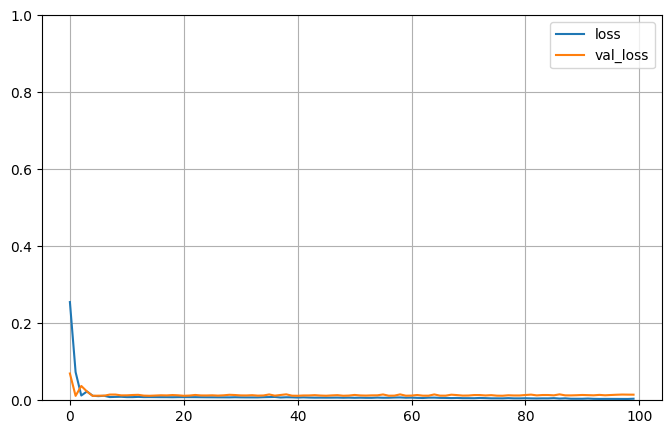

1/1 [==============================] - 0s 31ms/step - loss: 0.0063
Test Loss: 0.006264409050345421


In [ ]:

# define FNN neural network to train data
#activation function is ReLU which were suggested in the book and gives the input number fot posetives=>
#=>and gives 0 for negative input numbers
tf.random.set_seed(42)
model = keras.Sequential()
model.add(keras.layers.Dense(60, activation='relu'))#input layer
model.add(keras.layers.Dense(32, activation='sigmoid'))#hidden kayer
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))  # این باعث می شود که فولی کانکتد شوند

model.compile(loss='mean_squared_error', optimizer='adam')

# train the FNN for trainig data
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

# Plot the training history
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set range to [0-1]
plt.show()

# evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

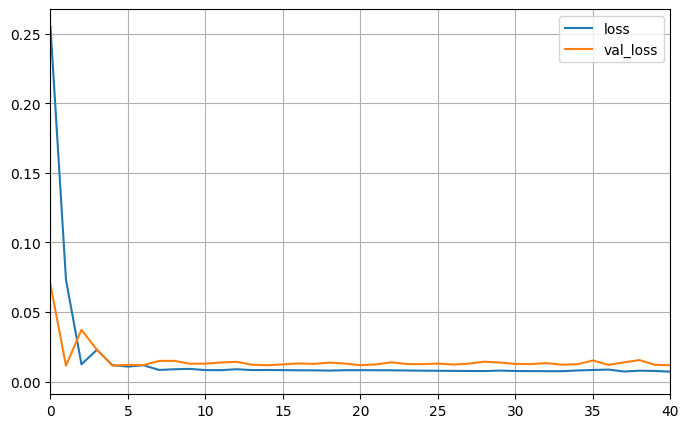

In [ ]:
history_df = pd.DataFrame(history.history)
ax = history_df.plot(figsize=(8, 5))
plt.grid(True)

# adjust the x-axis
plt.xlim(0,40)
plt.show()


In [ ]:
train_loss = model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)

test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)


2/2 [==============================] - 0s 8ms/step - loss: 0.0031
Train Loss: 0.003115632338449359
1/1 [==============================] - 0s 28ms/step - loss: 0.0063
Test Loss: 0.006264409050345421


In [ ]:
predictions = model.predict(X_test)


1/1 [==============================] - 0s 145ms/step


In [ ]:
# predictions
predictions = model.predict(X_test)

# compare predictions and actual values
for i in range(len(predictions)):
    print(f"Sample {i + 1} - Actual: {y_test[i]}, Predicted: {predictions[i][0]}")


1/1 [==============================] - 0s 23ms/step
Sample 1 - Actual: -0.4316207981321668, Predicted: -0.48915499448776245
Sample 2 - Actual: -0.4595969867877644, Predicted: -0.49813759326934814
Sample 3 - Actual: -0.5820590392624372, Predicted: -0.5101151466369629
Sample 4 - Actual: -0.39728489648391707, Predicted: -0.4970511198043823
Sample 5 - Actual: -0.3654445526597838, Predicted: -0.5172115564346313
Sample 6 - Actual: -0.5215773261597751, Predicted: -0.47378456592559814
Sample 7 - Actual: -0.49415607303876996, Predicted: -0.5434387922286987
Sample 8 - Actual: -0.4781024168879259, Predicted: -0.47357457876205444
Sample 9 - Actual: -0.5942136311875649, Predicted: -0.4949917197227478
Sample 10 - Actual: -0.6089132728057967, Predicted: -0.5141245722770691
Sample 11 - Actual: -0.4246497840197546, Predicted: -0.5134491324424744
Sample 12 - Actual: -0.5636389775392314, Predicted: -0.4931945204734802
Sample 13 - Actual: -0.4790393250542576, Predicted: -0.5245168805122375


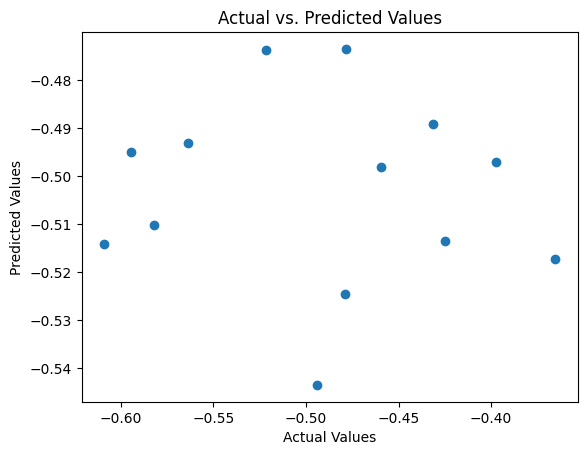

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


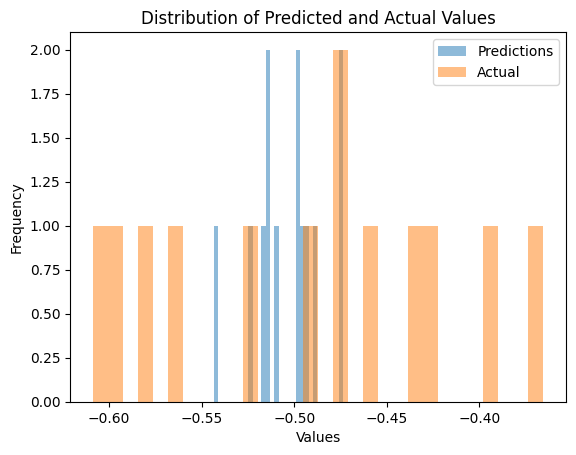

In [ ]:
plt.hist(predictions, bins=30, alpha=0.5, label="Predictions")
plt.hist(y_test, bins=30, alpha=0.5, label="Actual")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Predicted and Actual Values")
plt.show()


Epoch 1/100
3/3 [==============================] - 1s 128ms/step - loss: 0.3337 - val_loss: 0.0123
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.0206 - val_loss: 0.0326
Epoch 3/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0345 - val_loss: 0.0147
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0121 - val_loss: 0.0179
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0121 - val_loss: 0.0288
Epoch 6/100
3/3 [==============================] - 0s 30ms/step - loss: 0.0167 - val_loss: 0.0199
Epoch 7/100
3/3 [==============================] - 0s 31ms/step - loss: 0.0094 - val_loss: 0.0122
Epoch 8/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0087 - val_loss: 0.0118
Epoch 9/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0115 - val_loss: 0.0119
Epoch 10/100
3/3 [==============================] - 0s 36ms/step - loss: 0.0099 - val_loss: 0.0116
Epoch 11/100
3/3 [

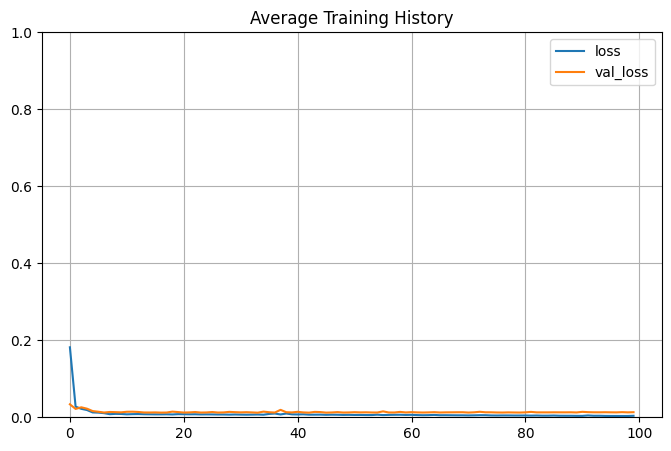

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd

num_runs = 5
all_history = []

# different runs
for run in range(num_runs):

    tf.random.set_seed(42)
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='sigmoid'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')

    history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val))

    # store the history for later averaging
    all_history.append(history.history)

    # evaluate the model for each run
    loss = model.evaluate(X_test, y_test)
    print(f"Test Loss (Run {run + 1}):", loss)

# average history
average_history = {}
for key in all_history[0].keys():
    average_history[key] = np.mean([history[key] for history in all_history], axis=0)

# Plot the average history
pd.DataFrame(average_history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set range to [0-1]
plt.title('Average Training History')
plt.show()


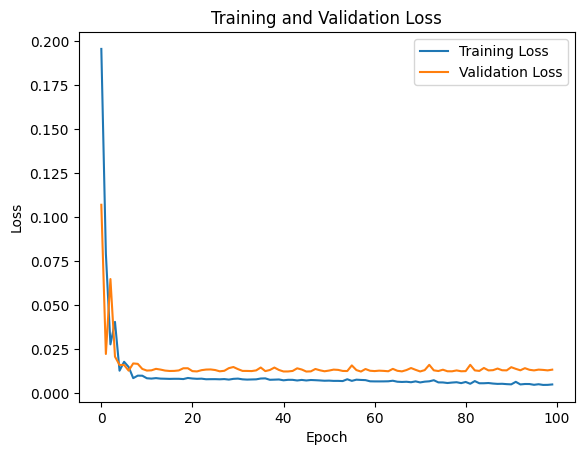

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/50
2/2 [==============================] - 2s 264ms/step - loss: 1.1415 - mae: 0.8212 - val_loss: 0.5028 - val_mae: 0.6836
Epoch 2/50
2/2 [==============================] - 0s 63ms/step - loss: 0.6200 - mae: 0.7405 - val_loss: 0.3227 - val_mae: 0.5582
Epoch 3/50
2/2 [==============================] - 0s 58ms/step - loss: 0.2800 - mae: 0.5205 - val_loss: 0.2310 - val_mae: 0.4680
Epoch 4/50
2/2 [==============================] - 0s 75ms/step - loss: 0.1921 - mae: 0.4282 - val_loss: 0.1562 - val_mae: 0.3783
Epoch 5/50
2/2 [==============================] - 0s 60ms/step - loss: 0.1219 - mae: 0.3360 - val_loss: 0.0948 - val_mae: 0.2838
Epoch 6/50
2/2 [==============================] - 0s 60ms/step - loss: 0.0671 - mae: 0.2405 - val_loss: 0.0520 - val_mae: 0.1918
Epoch 7/50
2/2 [==============================] - 0s 66ms/step - loss: 0.0319 - mae: 0.1541 - val_loss: 0.0275 - val_mae: 0.1401
Epoch 8/50
2/2 [==============================] - 0s 68ms/step - loss: 0.0161 - mae: 0.1027 - va

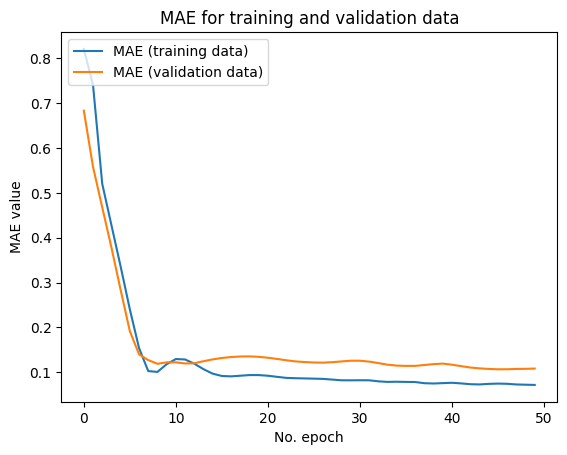

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Prepare data: scale features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(eigenvectors_matrix)
Mzt = np.array(Mzt)  # Convert Mzt to an array

# Ensure both datasets have the same number of samples
min_samples = min(len(scaled_data), len(Mzt))
scaled_data = scaled_data[:min_samples]
Mzt = Mzt[:min_samples]

# Reshape data for 1D CNN: (samples, time steps, features)
X = scaled_data.reshape(-1, scaled_data.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Mzt, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25*0.8=0.2

# Build the 1D CNN model
model = keras.Sequential([
    keras.layers.Conv1D(32, 3, activation='relu', input_shape=(scaled_data.shape[1], 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(64, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

# Plot training history
plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.title('MAE for training and validation data')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

# Save the model
model.save('cnn_model.h5')


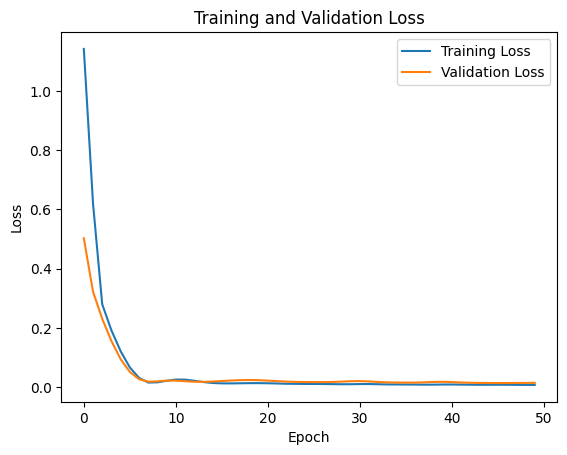

In [ ]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

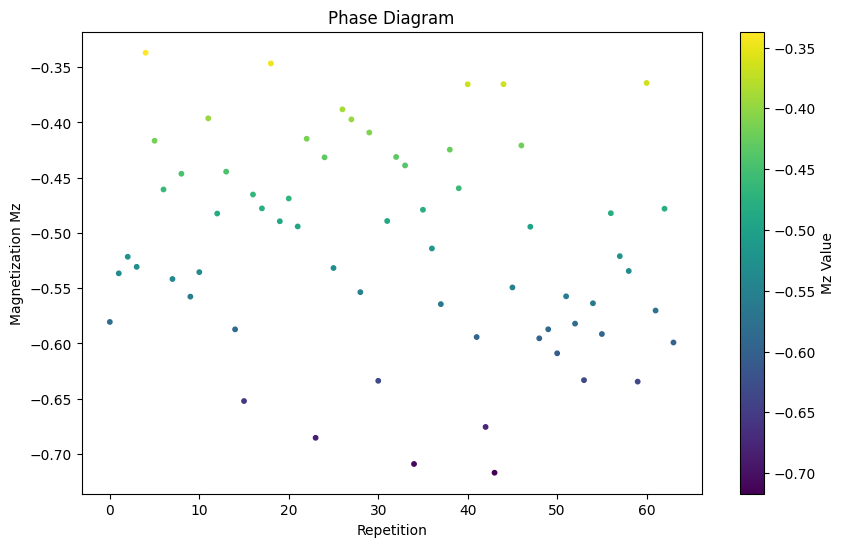

In [ ]:

# Reshape the Mzt values for visualization
Mzt = np.array(Mzt)

# Create a phase diagram
plt.figure(figsize=(10, 6))
plt.title('Phase Diagram')
plt.xlabel('Repetition')
plt.ylabel('Magnetization Mz')

# Plot the data
plt.scatter(range(len(Mzt)), Mzt, c=Mzt, cmap='viridis', s=10, marker='o')
plt.colorbar(label='Mz Value')
plt.show()
